# Analysis of data generated by Tektronix
Using the set up shown below, we are collecting and analysing data using Tektronix Oscilloscope generated by a green laser at 532nm.

<img src="Tektronix set up.jpg" alt="drawing" width="300"/>

A sample of the output of the oscilloscope:

<img src="Tektronix_oscilloscope_output.png" alt="drawing" width="300"/>

In [1]:
#import useful files
import statistics as stat
import numpy as np
import pandas as pd
import glob
import seaborn as sns
import matplotlib.ticker as mtick
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
#file path with glob
path = "Tektronix_data/"
all_files = glob.glob(path + "*.csv")

In [3]:
#shows all selected files once comma is removed
all_files;

In [4]:
#turn all 512 files into lists
var = [pd.read_csv(filename,index_col=None,header=0,skiprows=17) for filename in all_files]

In [5]:
var[0]

,TIME,CH1,CH2,CH3,CH4
0,-9.430000e-08,-0.004,0.002,-4.000000e-03,0.008
1,-9.410000e-08,-0.004,-0.002,4.440890e-17,0.008
2,-9.390000e-08,-0.004,-0.010,-8.000000e-03,0.004
3,-9.370000e-08,-0.012,-0.002,-8.000000e-03,0.008
4,-9.350000e-08,-0.004,-0.010,-4.000000e-03,0.008
...,...,...,...,...,...
995,1.047000e-07,-0.008,-0.006,4.440890e-17,0.008
996,1.049000e-07,0.000,0.002,-8.000000e-03,0.004
997,1.051000e-07,-0.008,-0.002,-8.000000e-03,0.008
998,1.053000e-07,-0.004,0.002,4.440890e-17,0.004


In [6]:
#concat all lists and turn into 1 big dataframe
dataframe = pd.concat(var,axis=0,ignore_index=True)

In [7]:
#renaming the headers (they came as Channel 1,2,3,4 - need to know what they represent)
rename = ['Time','Channel_1','Raman_Channel_Detection_640nm','Raman_Channel_Detection_660nm','Green_Channel_532nm']
dataframe.columns = rename

In [8]:
dataframe

,Time,Channel_1,Raman_Channel_Detection_640nm,Raman_Channel_Detection_660nm,Green_Channel_532nm
0,-9.430000e-08,-0.004,0.002,-4.000000e-03,0.008
1,-9.410000e-08,-0.004,-0.002,4.440890e-17,0.008
2,-9.390000e-08,-0.004,-0.010,-8.000000e-03,0.004
3,-9.370000e-08,-0.012,-0.002,-8.000000e-03,0.008
4,-9.350000e-08,-0.004,-0.010,-4.000000e-03,0.008
...,...,...,...,...,...
511995,1.047000e-07,0.000,-0.002,-8.000000e-03,0.008
511996,1.049000e-07,-0.004,-0.010,4.000000e-03,0.008
511997,1.051000e-07,0.000,-0.002,4.440890e-17,0.008
511998,1.053000e-07,-0.004,0.002,-4.000000e-03,0.004


It is a relief that there are 512000 rows, it is consistent with the 512 excel datasheets containing 1000 rows of data each. We will change the data types from objects to floats and take a quick look at the trends in this dataframe:

In [9]:
#change the data type
Clean_dataframe = dataframe.astype(float)

In [10]:
Clean_dataframe.head()

,Time,Channel_1,Raman_Channel_Detection_640nm,Raman_Channel_Detection_660nm,Green_Channel_532nm
0,-9.430000e-08,-0.004,0.002,-4.000000e-03,0.008
1,-9.410000e-08,-0.004,-0.002,4.440890e-17,0.008
2,-9.390000e-08,-0.004,-0.010,-8.000000e-03,0.004
3,-9.370000e-08,-0.012,-0.002,-8.000000e-03,0.008
4,-9.350000e-08,-0.004,-0.010,-4.000000e-03,0.008


In [11]:
#describe the dataframe
Clean_dataframe.describe()

,Time,Channel_1,Raman_Channel_Detection_640nm,Raman_Channel_Detection_660nm,Green_Channel_532nm
count,5.120000e+05,512000.000000,512000.000000,512000.000000,512000.000000
mean,5.600000e-09,-0.001546,0.001563,0.000549,0.013203
std,5.773505e-08,0.018937,0.037937,0.045438,0.056652
min,-9.430000e-08,-0.024000,-0.026000,-0.028000,-0.028000
25%,-4.435000e-08,-0.008000,-0.006000,-0.008000,0.000000
50%,5.600000e-09,-0.004000,-0.002000,-0.004000,0.004000
75%,5.555000e-08,0.000000,-0.002000,-0.004000,0.008000
max,1.055000e-07,0.360000,0.426000,0.548000,0.568000


Lets attempt to make the first plot with all the data points overlapping eachother, we require the time to be our new index column:

In [12]:
#Create a new column called PMT 2 which is the column PMT 2 - Larger Focal Length but in mV
uniform_dataframe=Clean_dataframe.assign(Time = Clean_dataframe['Time']*1e9)
#uniform_dataframe=Clean_dataframe.assign(Channel_1 = Clean_dataframe['Channel_1']*1000)
#uniform_dataframe=Clean_dataframe.assign(Raman_Channel_Detection_640nm = Clean_dataframe['Raman_Channel_Detection_640nm']*1000)
#uniform_dataframe=Clean_dataframe.assign(Raman_Channel_Detection_660nm = Clean_dataframe['Raman_Channel_Detection_660nm']*1000)
#uniform_dataframe=Clean_dataframe.assign(Green_Channel_532nm = Clean_dataframe['Green_Channel_532nm']*1000)

In [13]:
#uniform_dataframe=Clean_dataframe.assign(Channel_1 = Clean_dataframe['Channel_1']*1000)

In [14]:
#Setting the Time as the index column
uniform_dataframe.set_index("Time",drop=True,inplace=True)

In [15]:
#See Time as our index
uniform_dataframe.head()

,Channel_1,Raman_Channel_Detection_640nm,Raman_Channel_Detection_660nm,Green_Channel_532nm
Time,,,,
-94.3,-0.004,0.002,-4.000000e-03,0.008
-94.1,-0.004,-0.002,4.440890e-17,0.008
-93.9,-0.004,-0.010,-8.000000e-03,0.004
-93.7,-0.012,-0.002,-8.000000e-03,0.008
-93.5,-0.004,-0.010,-4.000000e-03,0.008


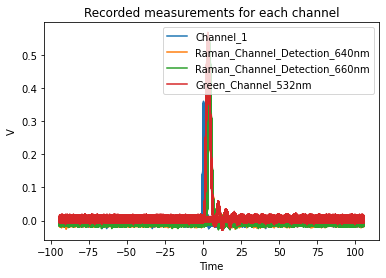

In [16]:
#Plot all columns against Time
plot_columns = ['Channel_1','Raman_Channel_Detection_640nm','Raman_Channel_Detection_660nm','Green_Channel_532nm']
uniform_dataframe[plot_columns].plot()

plt.xlabel('Time')
plt.ylabel('V')
plt.title('Recorded measurements for each channel')
plt.show()

That doesn't really show us the distribution much, the green channel is overpowering all other signals. Below we can see that the green channel is still really strong, so we use a second plot which shows the distribution of the other signals (without the green channel).

<AxesSubplot:title={'center':'Detection in Volts'}, xlabel='Time', ylabel='V'>

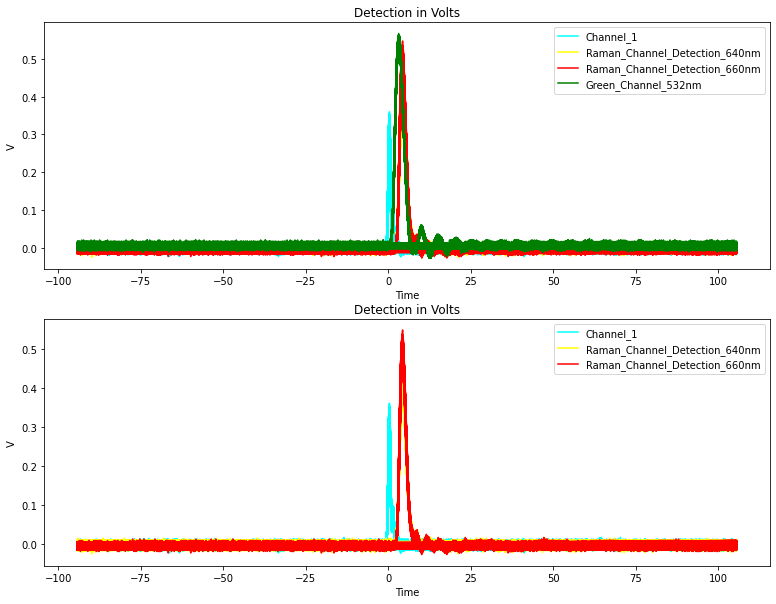

In [17]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(13,10));
uniform_dataframe[['Channel_1','Raman_Channel_Detection_640nm','Raman_Channel_Detection_660nm','Green_Channel_532nm']].plot(ax=axes[0],color=['cyan','yellow','red','green'],xlabel = 'Time',ylabel = 'V', title = 'Detection in Volts')
uniform_dataframe[['Channel_1','Raman_Channel_Detection_640nm','Raman_Channel_Detection_660nm']].plot(ax=axes[1],color=['cyan','yellow','red'],xlabel = 'Time',ylabel = 'V', title = 'Detection in Volts')

To analyse further, we need to split our dataframe into 512 separate dataframes:

In [18]:
#Split the large dataframe into 512 smaller dataframes
def split_dataframe_by_position(df, splits):
    dataframes = []
    index_to_split = len(df) // splits
    start = 0
    end = index_to_split
    for split in range(splits):
        temporary_df = df.iloc[start:end, :]
        dataframes.append(temporary_df)
        start += index_to_split
        end += index_to_split
    return dataframes
split_dataframes = split_dataframe_by_position(uniform_dataframe, 512)
#Test if our split is working
print('Quick test, the max value of the last dataframe = ',split_dataframes[511].Green_Channel_532nm.max(),'V')

Quick test, the max value of the last dataframe =  0.556 V


In [19]:
#For loop puts all the local Max Voltages into an empty list called localMaxVoltages and the Time of that occurance
localMaxVoltagePulse = []
localMaxVoltageTimePulse = []
i = 0
for i in range(0,511,1):
    localMaxVoltagePulse.append(split_dataframes[i].Channel_1.max())
    localMaxVoltageTimePulse.append(split_dataframes[i].Channel_1.idxmax())

Great, we have now 2 lists, a list of the Maximum voltages of each laser pulse (in millivolts) and its corresponding time (in nanoseconds). Below we will analyse both of these lists, displaying their:
- Length Count
- Maximum
- Minimum
- Mean
- Median
- Standard Deviation

In [20]:
#Quick analysis of the local Max Voltages
print('Length of the list of Max Voltages: {0} '.format(len(localMaxVoltagePulse)))
print('Maximum of Max Voltages: {0} V'.format(max(localMaxVoltagePulse)))
print('Minimum of Max Voltages: {0} V'.format(min(localMaxVoltagePulse)))
print('Mean of Max Voltages: {0} V'.format(stat.mean(localMaxVoltagePulse)))
print('Median of Max Voltages: {0} V'.format(stat.median(localMaxVoltagePulse)))
print('Standard Deviation of Max voltages: {0} V'.format(stat.stdev(localMaxVoltagePulse)))

Length of the list of Max Voltages: 511 
Maximum of Max Voltages: 0.36 V
Minimum of Max Voltages: 0.3 V
Mean of Max Voltages: 0.33194520547945205 V
Median of Max Voltages: 0.332 V
Standard Deviation of Max voltages: 0.009174395930686089 V


In [21]:
#Quick analysis of the time of local Max Voltages
print('Length of the list of Time: {0} '.format(len(localMaxVoltageTimePulse)))
print('Maximum Time of Max Voltages: {0} ns'.format(max(localMaxVoltageTimePulse)))
print('Minimum Time of Max Voltages: {0} ns'.format(min(localMaxVoltageTimePulse)))
print('Time of Mean of Max Voltages: {0} ns'.format(stat.mean(localMaxVoltageTimePulse)))
print('Time of Median of Max Voltages: {0} ns'.format(stat.median(localMaxVoltageTimePulse)))
print('Standard Deviation of Time of Max voltages: {0} ns'.format(stat.stdev(localMaxVoltageTimePulse)))

Length of the list of Time: 511 
Maximum Time of Max Voltages: 0.5 ns
Minimum Time of Max Voltages: 0.1 ns
Time of Mean of Max Voltages: 0.28551859099804305 ns
Time of Median of Max Voltages: 0.3 ns
Standard Deviation of Time of Max voltages: 0.05623545691537865 ns


It is important to note that just by looking at our standard deviation values, we are already much more accurate than our PicoScope data. The standard deviation for the Maximum voltage is roughly 9mV compared to 38mV for the PicoScope data, this comparison is exemplified if we look at their variances, which would to 81mV:1444mV. The standard deviation for Time is only 1/4 of the PicoScope data. Again, a very promising start!

### Plotting
Now that we have a general understanding of our dataset, we can plot them in various ways to extract more information. The first is a scatterplot of the maximum voltage of each pulse along with the time of occurance.

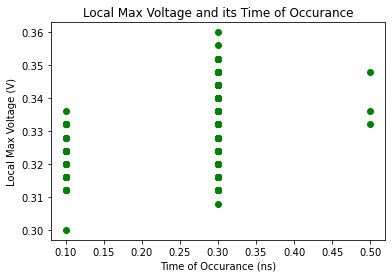

In [22]:
#Scatterplot of the local Max Voltage value and its Time of occurance
plt.scatter(localMaxVoltageTimePulse,localMaxVoltagePulse, c = 'g')

plt.xlabel('Time of Occurance (ns)')
plt.ylabel('Local Max Voltage (V)')
plt.title('Local Max Voltage and its Time of Occurance')
plt.show()

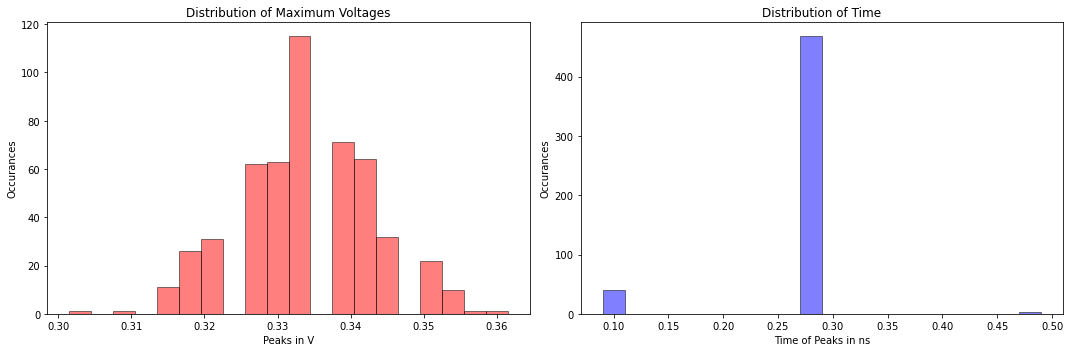

In [23]:
#Create histograms to show distribution of the scatterplot
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,5))

axes[0].hist(localMaxVoltagePulse, bins=20, align = 'right', color='red', edgecolor='black', alpha = 0.5)
axes[1].hist(localMaxVoltageTimePulse, bins=20, align = 'left', color='blue', edgecolor='black', alpha = 0.5)


axes[0].set(ylabel = 'Occurances',xlabel = 'Peaks in V',title = 'Distribution of Maximum Voltages')
axes[1].set(ylabel = 'Occurances',xlabel = 'Time of Peaks in ns',title = 'Distribution of Time')


fig.tight_layout()
plt.show()

The quantisation is immediately obvious in the scatter plot, especially in the Time axis. This can be seen even clearer in the histogram 'Distribution of Time', where the main spike at 0.28 ns takes up almost all the data. The distribution of maximum voltages is quite normally distributed, this is much better than the resulting graph for the picoscope which showed circular distribution. This is perhaps what the picoscope had attempted to show with its previously suspected quantisation, but was unsuccessful due to the undersampling problem.

#### Theory and data exploration
Intuitively, our next analysis would be looking for a relation between the individual maximum peak values to the green channel (532nm). We expect that for a stronger laser pulse, there will be larger the value of the green channel thus creating a positive relationship between them.

Having already split the data above, we simply needed to slightly modify the code to find the largest value for the green channel.

In [24]:
#For loop puts all the local Max Voltages into an empty list called localMaxVoltages and the Time of that occurance
localMaxVoltage = []
localMaxVoltageTime = []
i = 0
for i in range(0,511,1):
    localMaxVoltage.append(split_dataframes[i].Green_Channel_532nm.max())
    localMaxVoltageTime.append(split_dataframes[i].Green_Channel_532nm.idxmax())

In [25]:
#Quick analysis of the local Max Voltages
print('Length of the list of Max Voltages: {0} '.format(len(localMaxVoltage)))
print('Maximum of Max Voltages: {0} V'.format(max(localMaxVoltage)))
print('Minimum of Max Voltages: {0} V'.format(min(localMaxVoltage)))
print('Mean of Max Voltages: {0} V'.format(stat.mean(localMaxVoltage)))
print('Median of Max Voltages: {0} V'.format(stat.median(localMaxVoltage)))
print('Standard Deviation of Max voltages: {0} V'.format(stat.stdev(localMaxVoltage)))

Length of the list of Max Voltages: 511 
Maximum of Max Voltages: 0.568 V
Minimum of Max Voltages: 0.54 V
Mean of Max Voltages: 0.5541213307240705 V
Median of Max Voltages: 0.556 V
Standard Deviation of Max voltages: 0.004128446865325854 V


In [26]:
#Quick analysis of the time of local Max Voltages
print('Length of the list of Time: {0} '.format(len(localMaxVoltageTime)))
print('Maximum Time of Max Voltages: {0} ns'.format(max(localMaxVoltageTime)))
print('Minimum Time of Max Voltages: {0} ns'.format(min(localMaxVoltageTime)))
print('Time of Mean of Max Voltages: {0} ns'.format(stat.mean(localMaxVoltageTime)))
print('Time of Median of Max Voltages: {0} ns'.format(stat.median(localMaxVoltageTime)))
print('Standard Deviation of Time of Max voltages: {0} ns'.format(stat.stdev(localMaxVoltageTime)))

Length of the list of Time: 511 
Maximum Time of Max Voltages: 3.5 ns
Minimum Time of Max Voltages: 2.9 ns
Time of Mean of Max Voltages: 3.1407045009784738 ns
Time of Median of Max Voltages: 3.1 ns
Standard Deviation of Time of Max voltages: 0.10731433012552295 ns


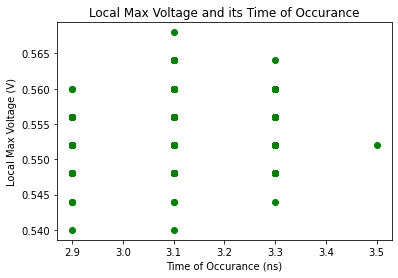

In [27]:
#Scatterplot of the local Max Voltage value and its Time of occurance
plt.scatter(localMaxVoltageTime,localMaxVoltage, c = 'g')

plt.xlabel('Time of Occurance (ns)')
plt.ylabel('Local Max Voltage (V)')
plt.title('Local Max Voltage and its Time of Occurance')
plt.show()

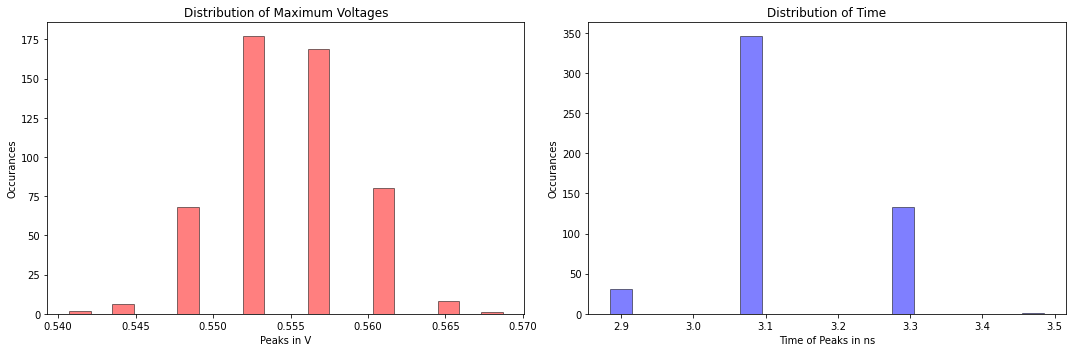

In [28]:
#Create histograms to show distribution of the scatterplot
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,5))

axes[0].hist(localMaxVoltage, bins=20, align = 'right', color='red', edgecolor='black', alpha = 0.5)
axes[1].hist(localMaxVoltageTime, bins=20, align = 'left', color='blue', edgecolor='black', alpha = 0.5)


axes[0].set(ylabel = 'Occurances',xlabel = 'Peaks in V',title = 'Distribution of Maximum Voltages')
axes[1].set(ylabel = 'Occurances',xlabel = 'Time of Peaks in ns',title = 'Distribution of Time')


fig.tight_layout()
plt.show()

There appears to be some kind of quantisation in the scatterplot, the peaks of the pulses are only willing to appear at specific times AND at specific locations. We should still be expecting a linear trend as discussed in the Analysis of PicoScope data notebook, so this is a baffling result.

The histogram representing the Distribution of Maximum Voltages show that the peaks of each pulse are normally distributed witht the mean at roughly 0.555V, this means as we were collecting this data, our laser was not exhibiting the common trait where it has a small pulse then a big pulse, in fact, from this we can see that most of the data collected were actually from larger pulses. There quantisation is proven much better here, the histogram is not extremely sensitive, but we can still very clearly see that there are specific spots which the peaks occur.

The histogram representing the Distribution of Time is quite differnt. I want to say that it is a right skewed distribution. There is a giant peak at 3.09 nanoseconds, that means most peaks occur at that time, taking the sum of the occurances of the mean distributions of maximum voltages, we arrive at roughly 350, which means the large occurances of that specific time corresponds to the centre peak of the histogram of Max Voltages. Again, very clearly, quantisation of time occurs here.

#### Raman Channel Analysis

Now we will try to observe any relationship between the peak of the pulse (Channel 1) and the Raman returns (Raman_Channel_Detection_640nm & Raman_Channel_Detection_660nm):

In [29]:
#For loop puts all the local Max Voltages into an empty list called localMaxVoltages and the Time of that occurance 
#For the Raman 640 nm PMT
localMaxVoltage_Raman640nm = []
localMaxVoltageTime_Raman640nm = []
i = 0
for i in range(0,511,1):
    localMaxVoltage_Raman640nm.append(split_dataframes[i].Raman_Channel_Detection_640nm.max())
    localMaxVoltageTime_Raman640nm.append(split_dataframes[i].Raman_Channel_Detection_640nm.idxmax())

In [30]:
#Quick analysis of the local Max Voltages
print('Length of the list of Max Voltages for Raman 640nm: {0} '.format(len(localMaxVoltage_Raman640nm)))
print('Maximum of Max Voltages for Raman 640nm: {0} V'.format(max(localMaxVoltage_Raman640nm)))
print('Minimum of Max Voltages for Raman 640nm: {0} V'.format(min(localMaxVoltage_Raman640nm)))
print('Mean of Max Voltages for Raman 640nm: {0} V'.format(stat.mean(localMaxVoltage_Raman640nm)))
print('Median of Max Voltages for Raman 640nm: {0} V'.format(stat.median(localMaxVoltage_Raman640nm)))
print('Standard Deviation of Max voltages for Raman 640nm: {0} V'.format(stat.stdev(localMaxVoltage_Raman640nm)))

Length of the list of Max Voltages for Raman 640nm: 511 
Maximum of Max Voltages for Raman 640nm: 0.426 V
Minimum of Max Voltages for Raman 640nm: 0.374 V
Mean of Max Voltages for Raman 640nm: 0.40228962818003916 V
Median of Max Voltages for Raman 640nm: 0.402 V
Standard Deviation of Max voltages for Raman 640nm: 0.008659703276779802 V


In [32]:
#Quick analysis of the local Max Voltages
print('Length of the list of Max Voltages for Raman 640nm: {0} '.format(len(localMaxVoltageTime_Raman640nm)))
print('Maximum of Max Voltages for Raman 640nm: {0} ns'.format(max(localMaxVoltageTime_Raman640nm)))
print('Minimum of Max Voltages for Raman 640nm: {0} ns'.format(min(localMaxVoltageTime_Raman640nm)))
print('Mean of Max Voltages for Raman 640nm: {0} ns'.format(stat.mean(localMaxVoltageTime_Raman640nm)))
print('Median of Max Voltages for Raman 640nm: {0} ns'.format(stat.median(localMaxVoltageTime_Raman640nm)))
print('Standard Deviation of Max voltages for Raman 640nm: {0} ns'.format(stat.stdev(localMaxVoltageTime_Raman640nm)))

Length of the list of Max Voltages for Raman 640nm: 511 
Maximum of Max Voltages for Raman 640nm: 4.5 ns
Minimum of Max Voltages for Raman 640nm: 4.1000000000000005 ns
Mean of Max Voltages for Raman 640nm: 4.286301369863014 ns
Median of Max Voltages for Raman 640nm: 4.3 ns
Standard Deviation of Max voltages for Raman 640nm: 0.10043151592143088 ns


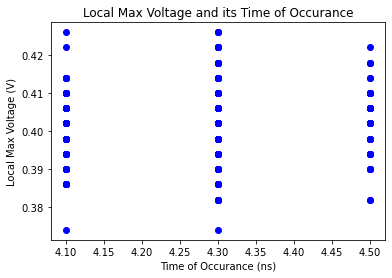

In [34]:
#Scatterplot of the local Max Voltage value and its Time of occurance
plt.scatter(localMaxVoltageTime_Raman640nm,localMaxVoltage_Raman640nm, c = 'b')

plt.xlabel('Time of Occurance (ns)')
plt.ylabel('Local Max Voltage (V)')
plt.title('Local Max Voltage and its Time of Occurance')
plt.show()

# INCOMPLETE ANALYSIS